# Class 17: Evaluating Classification and Midsemester Feedback

1. share your favorite rainy day activity (or just say hi) in the zoom chat for attendance
1. log onto prismia


## Naive Bayes Review


Main assumptions:
- classification assumes that features will separate the gorups
- NB:  conditionally independent

In [1]:
# %load http://drsmb.co/310
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.values[:,:4],
                                                    iris.species.values,
                                                    test_size=0.5, random_state=0)

In [4]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [5]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica

In [6]:
y_test

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', '

In [7]:
sum(y_pred == y_test)

71

In [8]:
len(y_pred)

75

## Evaluating Classification


We can use the `score` method to compute accuracy by providing both features and target for the test set.

In [9]:
gnb.score(X_test, y_test)

0.9466666666666667

Which is the same as the manual way we did before

In [10]:
sum(y_pred == y_test)/len(y_pred)

0.9466666666666667

Scikit learn also provides a whole metrics module. We'll look at two functions from it today.

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

First a Confusion matrix, which is the basic table of how the decisions were made. It counts how many from each true class were predicted to be in each class.  My favorite refernce on these is the table on the [wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix).

In [12]:
confusion_matrix(y_test,y_pred,)

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]])

We can see this makes sense from looking at the data.

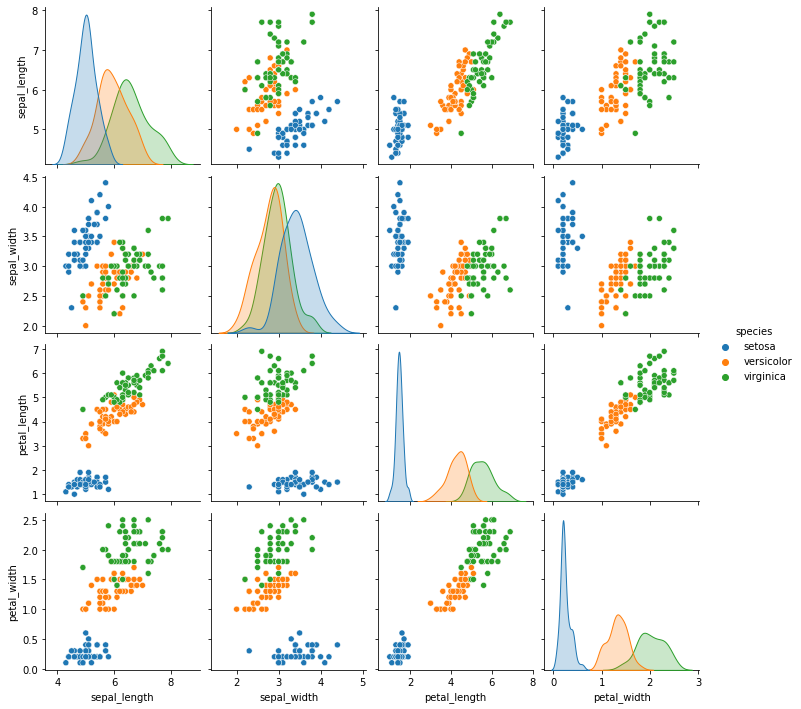

In [13]:
sns.pairplot(data =iris, hue='species')

We can also get a formatted report that uses the confusion matrix to compute multiple metrics

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.88      1.00      0.94        30
   virginica       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



## Inspecting a classifier

We can serialize any python object to inspect it with `__dict__`

In [15]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_features_in_': 4,
 'epsilon_': 3.6399040000000003e-09,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'theta_': array([[4.97586207, 3.35862069, 1.44827586, 0.23448276],
        [5.935     , 2.71      , 4.185     , 1.3       ],
        [6.77692308, 3.09230769, 5.73461538, 2.10769231]]),
 'sigma_': array([[0.10321047, 0.13208086, 0.01629013, 0.00846612],
        [0.256275  , 0.0829    , 0.255275  , 0.046     ],
        [0.38869823, 0.10147929, 0.31303255, 0.04763314]]),
 'class_count_': array([29., 20., 26.]),
 'class_prior_': array([0.38666667, 0.26666667, 0.34666667])}

It includes attributes `theta_` and `sigma_` these characterize the mean and the variance of each class. Naive Bayes is a generative classifier, since we're using the Guassian NB, it means it assumes that the data are Gaussian in each class. For a generative classifier, we can draw synthetic data from the model it learned.  We can use this to decide if what it learned makes sense by comparing it qualitatively (or statistically) to the real data.

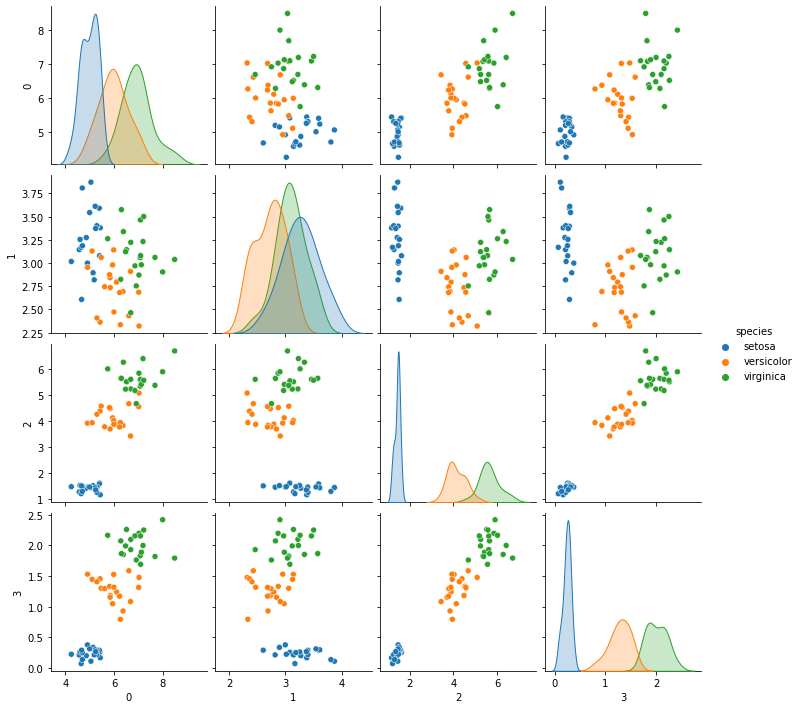

In [16]:
# %load http://drsmb.co/310
gnb_df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(mu, sig*np.eye(4),20)
                                  for mu, sig in zip(gnb.theta_,gnb.sigma_)]))
gnb_df['species'] = [ci for cl in [[c]*20 for c in gnb.classes_] for ci in cl]
sns.pairplot(data =gnb_df, hue='species')

## Feedback

Please complete this [feedback survey](https://forms.gle/yqWEPGJjFXDczuDv7) to provide input on how the semester is going for you so far.

## More practice

1. Try breaking down all the steps that are in the last cell one by one to understand them.
1. Read the documentation for naive bayes, how does it use the model parameters to make a prediction?